In [85]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno # library to visualize missing values
import warnings
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score


warnings.filterwarnings('ignore')

# Data Understanding

In [3]:
df = pd.read_csv('Mall_Customers.csv')
print('df shape', df.shape)

df shape (200, 5)


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# EDA

In [ ]:
df2 = df.drop('CustomerID', axis = 1)

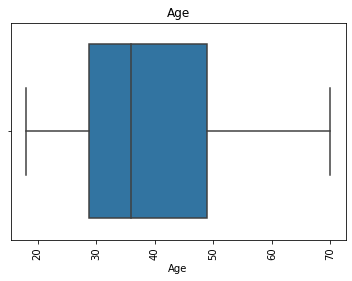

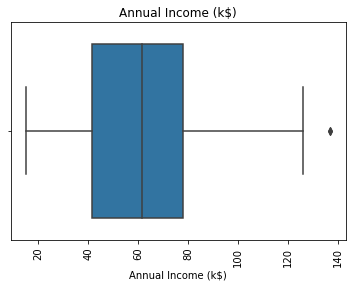

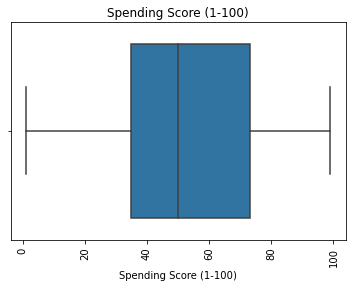

In [29]:
for col in df2.select_dtypes(include='number'):
    sns.boxplot(x= df[col])
    plt.ticklabel_format(axis = 'x',style = 'plain')
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

In [44]:
max(df['Spending Score (1-100)'].values)

99

In [13]:
df2.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

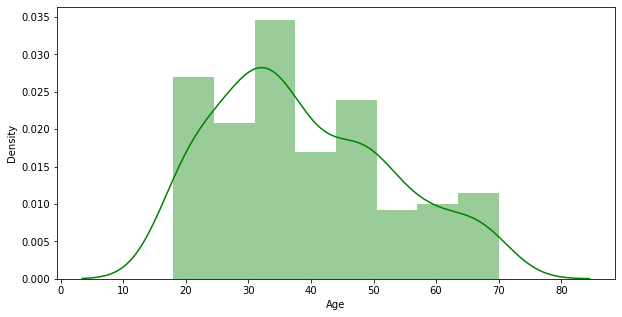

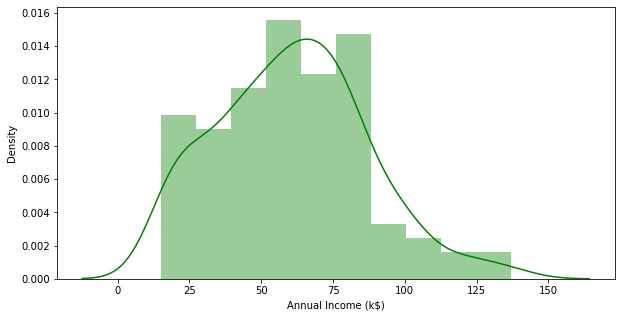

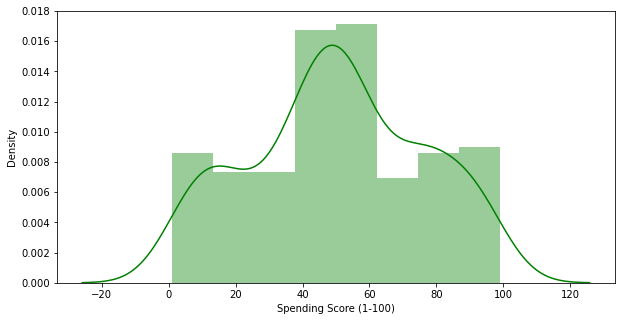

In [32]:
for i in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(10,5))
    sns.distplot(
        df2[i],
        color='green'
        
    )        

<AxesSubplot:xlabel='count', ylabel='Gender'>

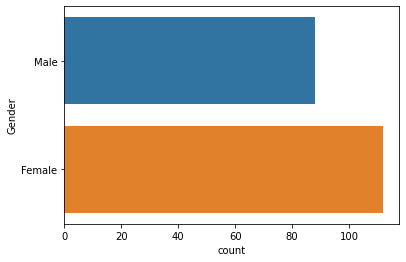

In [34]:
sns.countplot(y = df2['Gender'])

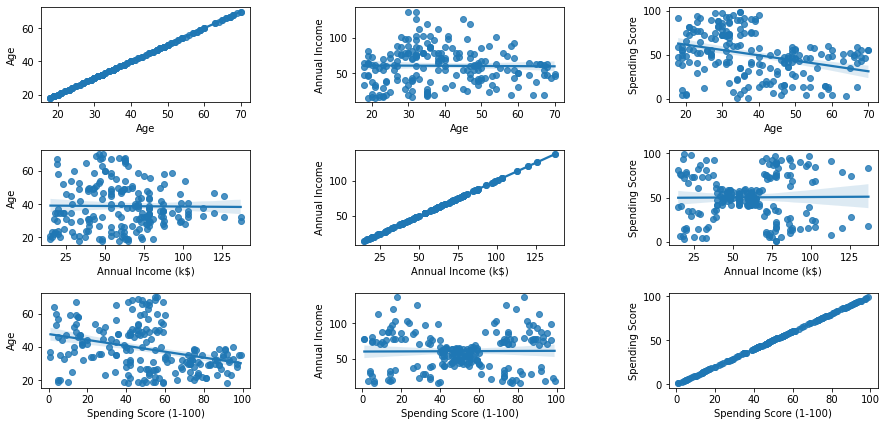

In [37]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in df2.select_dtypes(include='number').columns:
    for y in df2.select_dtypes(include='number').columns:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df2)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

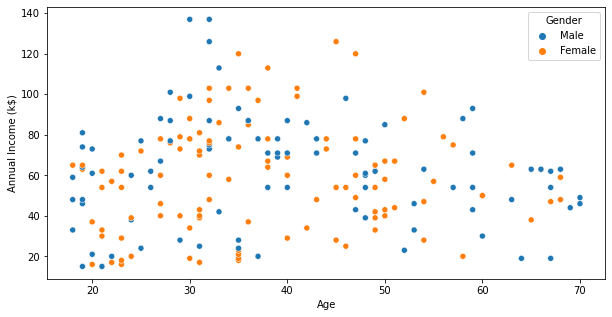

In [40]:
plt.figure(figsize=(10,5))
sns.scatterplot(data =df, x = 'Age', y ='Annual Income (k$)', hue='Gender',)

Text(0.5, 1.0, 'Annual Income vs Spending Score with Gender huer')

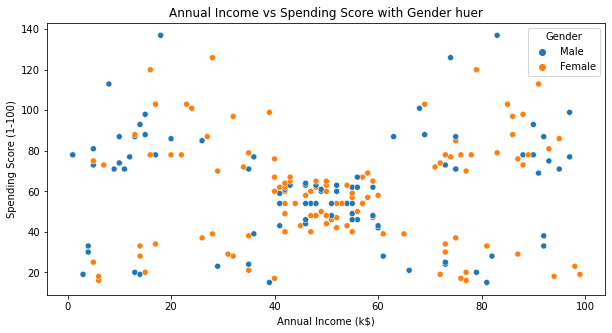

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(data =df, x = 'Spending Score (1-100)', y ='Annual Income (k$)', hue='Gender',)
plt.xlabel('Annual Income (k$)'),
plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score with Gender huer')

# Train Test Split

In [92]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [109]:
X = df2.drop(['Gender', 'Age'], axis = 1)
X.shape

(200, 2)

In [110]:

X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# K-mean

In [111]:
n_clusters = range(2,12)
inertia_errors = []
silhouette_scores = []
# Add `for` loop to train model and calculate inertia, silhouette score.
for k in n_clusters:
    model = KMeans(n_clusters= k , random_state= 42)
    #TRAIN MODEL
    model.fit(X)
    #CALCULATE INERTIA
    inertia_errors.append(model.inertia_)
    #CALCULATE SILHOUETTE SCORE
    silhouette_scores.append(silhouette_score(X , model.labels_))
print("Inertia:", inertia_errors,"\n")
print("Silhouette Scores:", silhouette_scores)

Inertia: [181363.59595959593, 106348.37306211118, 73679.78903948836, 44448.45544793371, 37233.81451071001, 30259.65720728547, 25011.839349156588, 21850.165282585633, 19672.07284901432, 17887.084456628647] 

Silhouette Scores: [0.2968969162503008, 0.46761358158775435, 0.4931963109249047, 0.553931997444648, 0.53976103063432, 0.5264283703685728, 0.45827056882053113, 0.4565077334305076, 0.45925273534781125, 0.43844724497454024]


 The best # of ciludters is 6

In [112]:
fig = px.line(x= range(2 , 12) , y= inertia_errors , title="K-Means Model: Inertia vs Number of Clusters")
fig.update_layout(xaxis_title="Number of Clusters" , yaxis_title="Inertia")
fig.show()

In [113]:
fig = px.line(x= n_clusters , y= silhouette_scores , title= "K-Means Model: Silhouette Score vs Number of Clusters")
fig.update_layout(xaxis_title= 'Number of Clusters' , yaxis_title= 'Silhouette Score')
fig.show();

In [114]:
model = KMeans(n_clusters=5 , random_state= 42)
model.fit(X)

KMeans(n_clusters=5, random_state=42)

In [115]:
labels = model.labels_
centroids = model.cluster_centers_

In [116]:
print(f'{labels[:6]}\n{centroids}')

[2 3 2 3 2 3]
[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


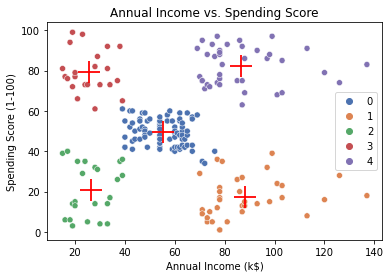

In [117]:
#plot "Annual Income" vs "Spending Score" with model labels
sns.scatterplot(x=df2['Annual Income (k$)'] , y= df2['Spending Score (1-100)'] ,
               hue=labels,
               palette='deep')
sns.scatterplot(
    x= centroids[:,0],
    y= centroids[: ,1],
    color= 'Red',
    marker= '+',
    s= 500
)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Annual Income vs. Spending Score");

In [118]:
#plotting side-by-side bar chart of `xgb`
xgb= X.groupby(final_model.labels_).mean()
fig = px.bar(
    xgb,
    barmode= 'group',
    title= "Annual income and spending score by Cluster"
)
fig.update_layout(xaxis_title= "Clusters" , yaxis_title= 'Value')

fig.show()

In [119]:
y=model.predict(X)

#get the cluster centroids    
centroids = model.cluster_centers_
centroids

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [121]:
print(y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
